# Question 1:

In [1]:
import pandas as pd

In [2]:
user = pd.read_csv('mydata.csv')
user

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [3]:
user.groupby(['occupation']).age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [4]:
user['gender'].apply(lambda x: 1 if x == 'M' else 0)

0      1
1      0
2      1
3      1
4      0
      ..
938    0
939    1
940    1
941    0
942    1
Name: gender, Length: 943, dtype: int64

In [5]:
user.groupby(['occupation']).gender.count()

occupation
administrator     79
artist            28
doctor             7
educator          95
engineer          67
entertainment     18
executive         32
healthcare        16
homemaker          7
lawyer            12
librarian         51
marketing         26
none               9
other            105
programmer        66
retired           14
salesman          12
scientist         31
student          196
technician        27
writer            45
Name: gender, dtype: int64

In [6]:
df1 = user.groupby(['occupation']).age.min()
df2 = user.groupby(['occupation']).age.max()
result = pd.concat([df1, df2], axis=1)
df3 = result.set_axis(['min', 'max'], axis=1, inplace=False)
df3

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [7]:
user.groupby(['occupation','gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [8]:
occ_by_gender = user.groupby(['occupation', 'gender']).gender.count()
occ_by_gender

occupation     gender
administrator  F          36
               M          43
artist         F          13
               M          15
doctor         M           7
educator       F          26
               M          69
engineer       F           2
               M          65
entertainment  F           2
               M          16
executive      F           3
               M          29
healthcare     F          11
               M           5
homemaker      F           6
               M           1
lawyer         F           2
               M          10
librarian      F          29
               M          22
marketing      F          10
               M          16
none           F           4
               M           5
other          F          36
               M          69
programmer     F           6
               M          60
retired        F           1
               M          13
salesman       F           3
               M           9
scientist      F     

In [9]:
count_by_occ = user.groupby('occupation').gender.count()
count_by_occ

occupation
administrator     79
artist            28
doctor             7
educator          95
engineer          67
entertainment     18
executive         32
healthcare        16
homemaker          7
lawyer            12
librarian         51
marketing         26
none               9
other            105
programmer        66
retired           14
salesman          12
scientist         31
student          196
technician        27
writer            45
Name: gender, dtype: int64

In [10]:
result1 = occ_by_gender.div(count_by_occ,level= 'occupation') 

In [11]:
result1

occupation     gender
administrator  F         0.455696
               M         0.544304
artist         F         0.464286
               M         0.535714
doctor         M         1.000000
educator       F         0.273684
               M         0.726316
engineer       F         0.029851
               M         0.970149
entertainment  F         0.111111
               M         0.888889
executive      F         0.093750
               M         0.906250
healthcare     F         0.687500
               M         0.312500
homemaker      F         0.857143
               M         0.142857
lawyer         F         0.166667
               M         0.833333
librarian      F         0.568627
               M         0.431373
marketing      F         0.384615
               M         0.615385
none           F         0.444444
               M         0.555556
other          F         0.342857
               M         0.657143
programmer     F         0.090909
               M         0

# Question 2:

In [12]:
import pandas as pd

In [13]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

In [14]:
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [15]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [16]:
euro12.Team.count()

16

In [17]:
len(euro12.columns)

35

In [18]:
discipline = euro12[['Team', 'Red Cards','Yellow Cards']]
discipline

,Team,Red Cards,Yellow Cards
0,Croatia,0,9
1,Czech Republic,0,7
2,Denmark,0,4
3,England,0,5
4,France,0,6
5,Germany,0,4
6,Greece,1,9
7,Italy,0,16
8,Netherlands,0,5
9,Poland,1,7


In [19]:
discipline.sort_values(by=['Red Cards', 'Yellow Cards'])

,Team,Red Cards,Yellow Cards
2,Denmark,0,4
5,Germany,0,4
3,England,0,5
8,Netherlands,0,5
15,Ukraine,0,5
4,France,0,6
12,Russia,0,6
1,Czech Republic,0,7
14,Sweden,0,7
0,Croatia,0,9


In [20]:
discipline['Yellow Cards'].mean()

7.4375

In [21]:
euro12[euro12['Goals']>6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [22]:
GTeams = euro12[euro12['Team'].str.startswith('G'or 'g')]
GTeams

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [23]:
first_7_Columns = euro12.iloc[:, 0:7]
first_7_Columns

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [24]:
except_last_3_columns = euro12.iloc[:, 0:-3]
except_last_3_columns

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [25]:
Accuracy_shooting = euro12.loc[euro12['Team'].isin(['England','Italy','Russia'])]
Accuracy_shooting[['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3:

In [26]:
import numpy as np

In [27]:
a = np.random.randint(1,5,100)
a.shape

(100,)

In [28]:
b = np.random.randint(1,4,100)
b

array([1, 3, 3, 1, 2, 1, 1, 2, 3, 2, 2, 3, 3, 3, 2, 1, 3, 2, 3, 2, 2, 3,
       1, 2, 3, 1, 3, 2, 3, 3, 1, 2, 2, 2, 3, 1, 1, 3, 1, 2, 3, 3, 1, 1,
       3, 3, 3, 2, 2, 1, 2, 3, 2, 1, 1, 3, 3, 3, 1, 2, 1, 2, 3, 2, 3, 2,
       3, 2, 1, 3, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 1, 2, 1,
       2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 3, 1])

In [29]:
c = np.random.randint(10000,30000,100)
c

array([23839, 15323, 20694, 10111, 13634, 14259, 21612, 29571, 16480,
       27900, 25868, 13086, 11687, 18093, 19280, 13238, 25772, 22540,
       18487, 18008, 27148, 14949, 26812, 22001, 14167, 15630, 13190,
       15480, 13026, 17687, 28092, 28742, 26507, 11562, 12285, 27802,
       20592, 26347, 29013, 12910, 22989, 29985, 26738, 16066, 24317,
       15132, 14787, 27365, 19586, 11617, 20242, 17465, 25694, 25334,
       22553, 23727, 22465, 10739, 22960, 28283, 21741, 21516, 20771,
       19919, 13369, 19852, 18313, 14623, 12347, 16937, 17334, 26827,
       22640, 19929, 10990, 14695, 22025, 16422, 18698, 28116, 29955,
       22315, 22262, 16762, 28483, 17938, 14607, 28593, 16283, 15746,
       20489, 14351, 26245, 17181, 22537, 18970, 16864, 17631, 29341,
       13140])

In [30]:
series1 = pd.Series(a)
series2 = pd.Series(b)
series3 = pd.Series(c)

In [31]:
df1 = pd.concat([series1,series2,series3],axis=1)
df1.columns = ['bedrs','bathrs','price_sqr_meter']
df1

,bedrs,bathrs,price_sqr_meter
0,4,1,23839
1,2,3,15323
2,2,3,20694
3,1,1,10111
4,1,2,13634
...,...,...,...
95,2,2,18970
96,1,2,16864
97,4,2,17631
98,1,3,29341


In [32]:
bigcolumn = pd.concat([series1,series2,series3],axis=0)
bigcolumn

0         4
1         2
2         2
3         1
4         1
      ...  
95    18970
96    16864
97    17631
98    29341
99    13140
Length: 300, dtype: int32

In [33]:
len(bigcolumn) #so the answer of the question "Ops it seems it is going only until index 99. Is it true?" --> no because the length of the bigcolumn is 300.

300

In [34]:
bigcolumn.reset_index(drop=True,inplace=True)
bigcolumn

0          4
1          2
2          2
3          1
4          1
       ...  
295    18970
296    16864
297    17631
298    29341
299    13140
Length: 300, dtype: int32

# Question 4:

In [35]:
import pandas as pd
import numpy as np

In [36]:
data = pd.read_csv('wind.txt',sep = '\s+')
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [37]:
data["Date"] = pd.to_datetime(data[["Dy","Mo","Yr"]].astype(str).agg('/'.join, axis=1))

In [38]:
data.drop(data.columns[[0,1,2]],axis=1, inplace=True)

In [39]:
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-02-01
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-03-01
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-04-01
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


As we can not have future data I think this data is historical and instead of 2061 there should be 1961.

In [40]:
data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year < 2000,data.Date,data.Date - pd.offsets.DateOffset(years=100))

In [41]:
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-02-01
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-03-01
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-04-01
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


In [42]:
data['Date'].dtype

dtype('<M8[ns]')

In [43]:
data.set_index('Date',inplace = True)


In [44]:
data.index.astype("datetime64[ns]")

DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

In [45]:
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-02-01,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-03-01,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-04-01,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-05-01,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [46]:
sum(data.isnull().values.ravel())

31

In [47]:
sum(data.count())

78857

In [48]:
wind_by_category = data.mean()
overallMeanOfWind = wind_by_category.mean()

In [49]:
overallMeanOfWind

10.227982360836924

In [50]:
mydata = data.describe().transpose()
mydata

,count,mean,std,min,25%,50%,75%,max
RPT,6568.0,12.362987,5.618413,0.67,8.12,11.71,15.92,35.80
VAL,6571.0,10.644314,5.267356,0.21,6.67,10.17,14.04,33.37
ROS,6572.0,11.660526,5.008450,1.50,8.00,10.92,14.67,33.84
KIL,6569.0,6.306468,3.605811,0.00,3.58,5.75,8.42,28.46
SHA,6572.0,10.455834,4.936125,0.13,6.75,9.96,13.54,37.54
BIR,6574.0,7.092254,3.968683,0.00,4.00,6.83,9.67,26.16
DUB,6571.0,9.797343,4.977555,0.00,6.00,9.21,12.96,30.37
CLA,6572.0,8.495053,4.499449,0.00,5.09,8.08,11.42,31.08
MUL,6571.0,8.493590,4.166872,0.00,5.37,8.17,11.19,25.88
CLO,6573.0,8.707332,4.503954,0.04,5.33,8.29,11.63,28.21


In [51]:
loc_stats = mydata[['min','max','mean']].transpose()
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.00000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.88000,28.210000,42.380000,42.540000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.49359,8.707332,13.121007,15.599079


In [52]:
def stats(day):
    day = pd.Series(day)
    Min = day.min()
    Max = day.max()
    Mean = day.mean()
    Std = day.std()
    mystats = [Min,Max,Mean,Std]
    indx = ["Min","Max","Mean","Std"]
    mystats = pd.Series(mystats,index=indx)
    return mystats

In [53]:
day_stats = data.apply(stats,axis=1)
day_stats.head(10)

,Min,Max,Mean,Std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-02-01,6.50,17.54,11.336364,3.188994
1961-03-01,6.17,18.50,11.641818,3.681912
1961-04-01,1.79,11.75,6.619167,3.198126
1961-05-01,6.17,13.33,10.630000,2.445356
1961-06-01,4.42,13.21,8.240000,2.998063
1961-07-01,4.96,14.29,10.385000,3.072114
1961-08-01,5.91,16.62,10.487500,3.547237
1961-09-01,4.75,15.37,9.897500,2.905954


In [54]:
data[data.index.month == 1].mean()

RPT    14.271257
VAL    12.466219
ROS    12.803961
KIL     7.082599
SHA    11.548507
BIR     7.944803
DUB    11.265000
CLA     9.425699
MUL     9.356679
CLO     9.782025
BEL    14.277885
MAL    17.290467
dtype: float64

In [55]:
print( "Yearly:\n", data.resample('Y').mean())

Yearly:
                   RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507  

In [56]:
print ("Monthly:", data.resample('M').mean())

Monthly:                   RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-01-31  14.025667  11.344839  12.630000  7.700968  11.175172  8.567742   
1961-02-28  13.912143  12.270741  11.774074  8.007778  12.605714  9.527857   
1961-03-31  11.628387  10.619032  10.850968  6.994333  10.326129  8.146129   
1961-04-30  10.886333   9.140667   9.406667  6.137333   8.613667  6.213000   
1961-05-31  10.618065   8.858667  10.903548  5.904000   9.279677  6.510000   
...               ...        ...        ...       ...        ...       ...   
1978-08-31   9.966129   8.520645   9.548387  4.628387   7.743548  6.326452   
1978-09-30  11.483000  11.269000  11.155667  5.809667  10.677667  8.484667   
1978-10-31   9.689677   9.230000   9.269032  4.801935   8.449355  6.615806   
1978-11-30  16.389000  13.451333  13.436000  7.337667  11.388000  8.661000   
1978-12-31  13.391613  10.460645  13.484839  5.690323  

In [57]:
print ("Weekly:", data.resample('W').mean())

Weekly:                   RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  11.984286   9.997143   9.974286   6.668571  10.421429   7.357143   
1961-01-15  10.530000   7.678571   8.921429   4.220000   6.828571   4.061429   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  12.922857   7.970000  12.404286   4.148571   7.322857   5.041429   
1978-12-10  10.400000   7.935714   9.571429   5.148571   8.211429   6.654286   
1978-12-17  16.781429  14.651429  14.464286   6.742857  11.070000   6.802857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429

In [58]:
data.groupby(lambda x: (x.month,x.year)).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
"(1, 1961)",14.025667,11.344839,12.630000,7.700968,11.175172,8.567742,10.331290,9.193548,8.847000,9.700968,13.417742,13.392667
"(1, 1962)",13.761290,11.902903,11.983548,7.423548,11.238065,8.319355,12.710645,9.255484,9.193871,11.064516,15.060000,15.084194
"(1, 1963)",13.889032,10.510968,14.201935,6.945806,10.822903,7.765484,11.635161,9.844194,8.061935,9.081935,11.752903,16.576452
"(1, 1964)",13.002258,12.248710,12.470968,6.660645,12.093871,7.805484,11.042258,10.351613,7.665806,10.427742,14.590968,15.178710
"(1, 1965)",14.234516,13.629032,14.897419,7.861290,12.737419,8.528387,13.030000,10.116452,9.430000,10.693226,14.158710,16.139032
...,...,...,...,...,...,...,...,...,...,...,...,...
"(12, 1974)",17.643548,15.662903,14.478387,8.969355,15.064194,9.454516,14.723226,13.915806,13.462581,11.904839,16.646129,22.255806
"(12, 1975)",12.284194,9.472903,11.628065,4.902258,7.494516,5.030968,9.904194,6.811290,8.859355,7.333548,11.946774,16.794194
"(12, 1976)",12.737097,10.090323,11.983226,4.800968,8.621613,6.486452,8.446774,6.262903,7.457419,7.157742,9.311935,15.550000
"(12, 1977)",12.778387,11.443871,11.028065,5.883548,10.403871,8.185806,11.448065,8.799677,9.193226,8.155806,12.647097,17.192903


In [59]:
year1961 = data[data.index.year == 1961]
print("Weekly Mean for Year 1961:\n",year1961.resample('W').mean().mean())
print("Weekly Min for Year 1961:\n",year1961.resample('W').min().mean())
print("Weekly Max for Year 1961:\n",year1961.resample('W').max().mean())
print("Weekly Std for Year 1961:\n",year1961.resample('W').std().mean())

Weekly Mean for Year 1961:
 RPT    12.376447
VAL    10.425503
ROS    11.386375
KIL     6.992242
SHA    10.876502
BIR     7.764340
DUB     9.794335
CLA     8.879856
MUL     8.688607
CLO     9.873836
BEL    13.583612
MAL    13.701258
dtype: float64
Weekly Min for Year 1961:
 RPT    6.877925
VAL    5.445094
ROS    6.119811
KIL    3.266415
SHA    5.999808
BIR    3.689245
DUB    4.844906
CLA    4.033962
MUL    4.460377
CLO    5.419057
BEL    7.542830
MAL    7.609811
dtype: float64
Weekly Max for Year 1961:
 RPT    19.017736
VAL    16.100189
ROS    18.056038
KIL    11.740566
SHA    16.801538
BIR    12.321887
DUB    15.902642
CLA    14.327547
MUL    13.754717
CLO    15.092264
BEL    20.666604
MAL    20.782642
dtype: float64
Weekly Std for Year 1961:
 RPT    4.502659
VAL    3.897657
ROS    4.367652
KIL    3.137677
SHA    3.842159
BIR    3.138082
DUB    3.993506
CLA    3.745388
MUL    3.320707
CLO    3.537364
BEL    4.855126
MAL    4.792375
dtype: float64


# Question 5:

In [60]:
import pandas as pd

In [61]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [62]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [63]:
chipo.shape[0]

4622

In [64]:
chipo.shape[1]

5

In [65]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [66]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [67]:
chipo['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [68]:
chipo['item_name'].nunique()

50

In [69]:
chipo["choice_description"].value_counts().head()

[Diet Coke]                                                                          134
[Coke]                                                                               123
[Sprite]                                                                              77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
Name: choice_description, dtype: int64

In [70]:
sum(chipo["quantity"])

4972

In [71]:
chipo['item_price'] = chipo.item_price.apply(lambda x: float(x[1:-1]))

In [72]:
chipo.item_price.dtype

dtype('float64')

In [73]:
sum(chipo["item_price"])

34500.16000000046

In [74]:
chipo["order_id"].value_counts().count()

1834

In [75]:
chipo.tail()

,order_id,quantity,item_name,choice_description,item_price
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",8.75


In [76]:
chipo_mean = chipo['item_price']/chipo['quantity']
chipo_mean.mean()

7.084424491562234

In [77]:
chipo['item_name'].nunique()

50

# Question 6:

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
df5 = pd.read_csv('us-marriages-divorces-1867-2014.csv')
df5

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


In [80]:
df6 = df5[['Marriages_per_1000','Divorces_per_1000']]
print(df6)
df7 = df5['Year']
print(df7)

     Marriages_per_1000  Divorces_per_1000
0                   9.7                0.3
1                   9.1                0.3
2                   9.0                0.3
3                   8.8                0.3
4                   8.8                0.3
..                  ...                ...
140                 7.3                2.8
141                 7.1                2.8
142                 6.8                2.7
143                 6.8                2.8
144                 6.8                2.8

[145 rows x 2 columns]
0      1867
1      1868
2      1869
3      1870
4      1871
       ... 
140    2007
141    2008
142    2009
143    2010
144    2011
Name: Year, Length: 145, dtype: int64


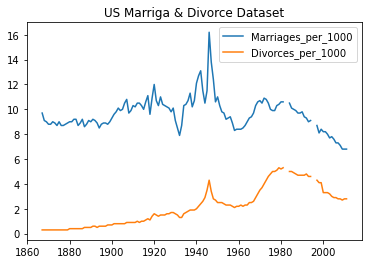

In [81]:
my_columns = df6.columns

x_data = df7

fig, ax = plt.subplots()

for i in my_columns:
    ax.plot(x_data, df6[i])
ax.set_title('US Marriga & Divorce Dataset')
ax.legend(my_columns)

In [82]:
df9 = df5[df5['Year'].apply(lambda x: x in [1900, 1950, 2000])]
df9

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
33,1900,709000.0,56000.0,76094000,9.3,0.7
83,1950,1667000.0,385000.0,151684000,11.0,2.5
133,2000,2315000.0,944000.0,282398000,8.2,3.3


# Question 7:

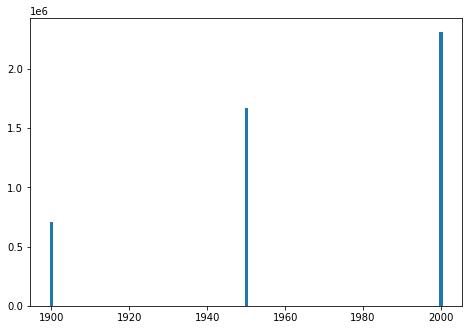

In [83]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df9['Year'],df9['Marriages'])
plt.show()

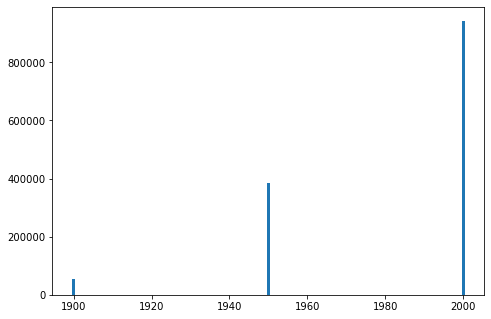

In [84]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df9['Year'],df9['Divorces'])
plt.show()

# Question 8:

In [85]:
df10 = pd.read_csv('actor_kill_counts.csv')
df10


,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


                   Actor  Count
0  Arnold Schwarzenegger    369
1           Chow Yun-Fat    295
2         Clint Eastwood    207
3             Clive Owen    194
4         Dolph Lundgren    239
5                 Jet Li    201
6           Nicolas Cage    204
7     Sylvester Stallone    267
8    Tomisaburo Wakayama    226
9          Wesley Snipes    193


Text(0.5, 1.0, 'Actors with their kills:')

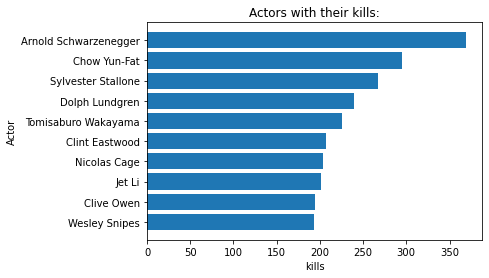

In [86]:
print(df10)
df10.sort_values(by=['Count'],ascending=False,inplace=True)
fig, ax = plt.subplots()

hbars = ax.barh(df10['Actor'],df10['Count'], align='center')
ax.set_yticks(df10['Actor'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('kills')
ax.set_ylabel('Actor')
ax.set_title('Actors with their kills:')


# Question 9:

In [87]:
df11 = pd.read_csv('roman-emperor-reigns.csv')
df11

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


In [88]:
df12= df11[df11['Cause_of_Death'].apply(lambda x: x in ['Assassinated'])]
df12

,Emperor,Length_of_Reign,Cause_of_Death
2,Caligula,4.83,Assassinated
5,Galba,0.58,Assassinated
7,Vitellius,0.67,Assassinated
10,Domitian,15.00,Assassinated
17,Commodus,15.00,Assassinated
18,Pertinax,0.25,Assassinated
21,Caracalla,19.00,Assassinated
22,Geta,3.00,Assassinated
24,Elagabalus,3.75,Assassinated
25,Severus Alexander,13.00,Assassinated


Cause_of_Death       
Assassinated             22
Natural causes           16
Killed in battle          8
Possibly assassinated     8
Illness                   5
Suicide                   5
Executed                  3
Died in captivity         1
dtype: int64


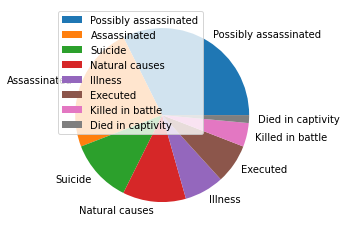

In [89]:
z = df11.value_counts(['Cause_of_Death'])
mylabels = df11['Cause_of_Death'].unique()
print(z)
plt.pie(z,labels = mylabels)
plt.legend(loc = 'upper left')
plt.show() 

# Question 10:

In [90]:
df12 = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
df12

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


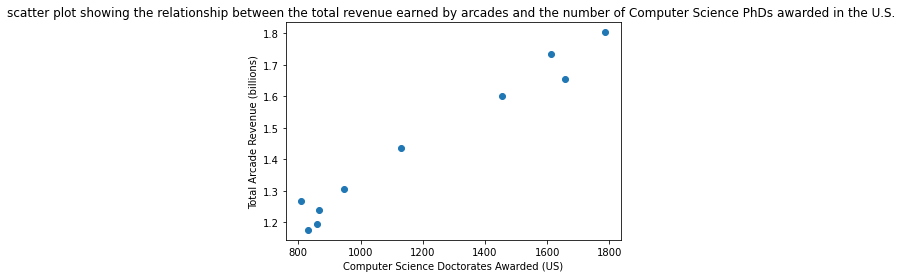

In [91]:
plt.scatter(df12['Computer Science Doctorates Awarded (US)'],df12['Total Arcade Revenue (billions)'])
plt.ylabel('Total Arcade Revenue (billions)')
plt.xlabel('Computer Science Doctorates Awarded (US)')
plt.title('scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. ')
plt.show()